**Hello World Example**

_This notebook is partly based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "CNN_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# Import the Keras API from Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K

D:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from http://mldata.org. 

In [4]:
from sklearn.datasets import fetch_mldata
import math

mnist = fetch_mldata('MNIST original')

# Use the notion of y=f(X)
X, y = mnist["data"], mnist["target"]
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0
The images are of size: 28.0 x 28.0


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# Test and Training Data
Let's split into training images and test images.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7, stratify=y, random_state=42)

# shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
# X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]

# reshape into images
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for training'.format(X_test.shape[0]))

Matrix shape X:  (60000, 28, 28, 1)
60000 samples for training
10000 samples for training


Plot an image as sanity check.

Number:  7.0


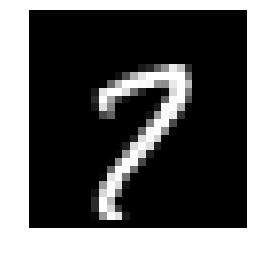

In [6]:
plot_image(X_train[15000,:,:,0])
print('Number: ', y_train[15000])

# LeNet-5
Build a LeNet-5 model in Keras. For LeNet-5 the simple sequential model is sufficient (it is only a sequence of layers without branching). LeNet starts actually with a $32 \times 32 $ input while in sklearn, we have $28 \times 28$. We are also going to use Relu instead of the sigmoid activation function. 

In [7]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

Turn the numbers into one-hot vectors

In [9]:
nClasses = 10
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)


See if it worked

In [10]:
for i in range(0,200,20):
    print(y_train[i], " ", y_train_k[i,:])


6.0   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
3.0   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1.0   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2.0   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
9.0   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5.0   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1.0   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
6.0   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2.0   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5.0   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MNIST Training

In [11]:
batchSize = 128
nEpochs = 32

history = model.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                    validation_data=(X_test, y_test_k))


Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 5s 76us/step - loss: 1.8833 - acc: 0.6856 - val_loss: 0.4883 - val_acc: 0.8542
Epoch 2/32
60000/60000 [==============================] - 2s 29us/step - loss: 0.3787 - acc: 0.8881 - val_loss: 0.3335 - val_acc: 0.9001
Epoch 3/32
60000/60000 [==============================] - 2s 29us/step - loss: 0.2740 - acc: 0.9194 - val_loss: 0.2588 - val_acc: 0.9212
Epoch 4/32
60000/60000 [==============================] - 2s 30us/step - loss: 0.2245 - acc: 0.9338 - val_loss: 0.2158 - val_acc: 0.9327
Epoch 5/32
60000/60000 [==============================] - 2s 29us/step - loss: 0.1930 - acc: 0.9419 - val_loss: 0.1867 - val_acc: 0.9430
Epoch 6/32
60000/60000 [==============================] - 2s 30us/step - loss: 0.1710 - acc: 0.9489 - val_loss: 0.1861 - val_acc: 0.9433
Epoch 7/32
60000/60000 [==============================] - 2s 30us/step - loss: 0.1552 - acc: 0.9538 - val_loss: 0.1616 - val_acc

In [12]:
y_predict = model.predict_classes(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[ 976    1    3    0    0    0    2    0    4    0]
 [   0 1115    3    1    3    1    0    1    1    0]
 [   2    4  965    7    2    3    0    7    8    1]
 [   1    2    8  980    0    9    1    9    8    2]
 [   0    2    1    1  944    1    3    2    1   20]
 [   1    1    0    3    1  884    4    1    6    1]
 [   4    0    0    0    3    3  970    0    2    0]
 [   1    2    7    3    0    0    0 1023    0    6]
 [   4    2    2    9    1    2    4    1  946    4]
 [   1    4    0    2    9    7    0   11    5  955]]


In [14]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure LeNet5_confusion_matrix_errors


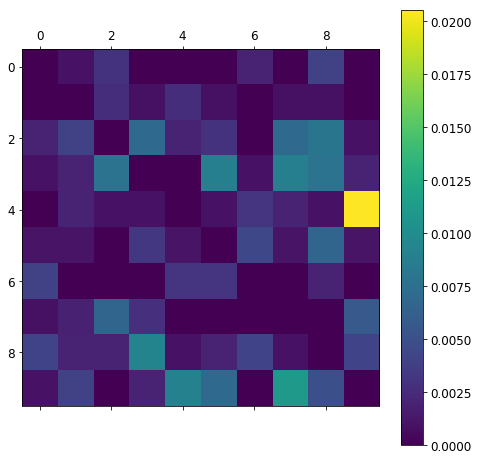

In [15]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("LeNet5_confusion_matrix_errors", tight_layout=False)
plt.show()

# Training History Visualization 

**Accuracy**
Source: Keras manual

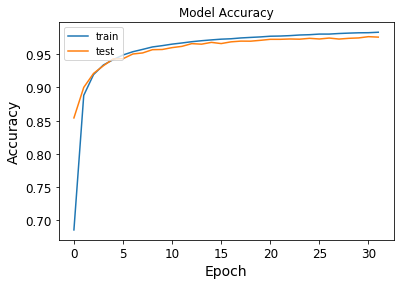

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



**Loss**
Source: Keras manual

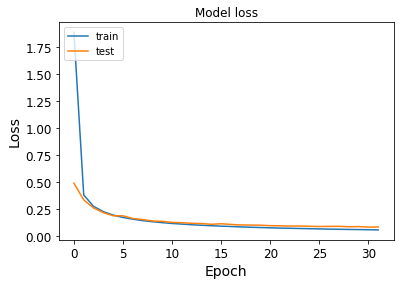

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

